# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import datetime as dt

In [4]:
import warnings; warnings.simplefilter('ignore')

## Importing the Dataset

In [5]:
data = pd.read_csv("/home/bashar/myWork/nyc_taxi_dataset/nyc_taxi_trip_duration.csv")

### Exploring the Dataset

In [6]:
data.shape

(729322, 11)

In [7]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [8]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [9]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [10]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [11]:
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

In [12]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [13]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [14]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [15]:
data['pickup_day'] = data['pickup_datetime'].dt.day_name()
data['dropoff_day'] = data['dropoff_datetime'].dt.day_name()

In [16]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday


In [17]:
data['pickup_day_no'] = data['pickup_datetime'].dt.weekday
data['dropoff_day_no'] = data['dropoff_datetime'].dt.weekday

In [18]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,4,4
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,6,6
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2


In [19]:
data["pickup_hour"] = data["pickup_datetime"].dt.hour
data["dropoff_hour"] = data["dropoff_datetime"].dt.hour

In [20]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,0,0,16,16
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,4,4,23,23
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,6,6,17,18
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1,9,10
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2,6,6


In [21]:
data["pickup_month"] = data["pickup_datetime"].dt.month
data["dropoff_month"] = data["dropoff_datetime"].dt.month

In [22]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,0,0,16,16,2,2
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,4,4,23,23,3,3
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,6,6,17,18,2,2
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,1,1,9,10,1,1
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,2,2,6,6,2,2


In [23]:
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,16):
        return "Afternoon"
    elif x in range(16,22):
        return "Evening"
    else:
        return "Late night"

In [24]:
data["pickup_time_of_day"] = data["pickup_hour"].apply(time_of_day)
data["dropoff_time_of_day"] = data["dropoff_hour"].apply(time_of_day)

In [25]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_day,dropoff_time_of_day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,Monday,0,0,16,16,2,2,Evening,Evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,Friday,4,4,23,23,3,3,Late night,Late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,Sunday,6,6,17,18,2,2,Evening,Evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,Tuesday,1,1,9,10,1,1,Morning,Morning
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,Wednesday,2,2,6,6,2,2,Morning,Morning


In [26]:
from geopy.distance import great_circle

In [27]:
def cal_distance(pickup_lat, pickup_long, dropoff_lat, dropoff_long):
    start_coordinates = (pickup_lat, pickup_long)
    stop_coordinates = (dropoff_lat, dropoff_long)
    
    return great_circle(start_coordinates, stop_coordinates).km

In [28]:
data["distance"] = data.apply(lambda x: cal_distance(x["pickup_latitude"], x["pickup_longitude"], x["dropoff_latitude"], x["dropoff_longitude"] ), axis=1)

In [29]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_day,dropoff_time_of_day,distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,Monday,0,0,16,16,2,2,Evening,Evening,1.199074
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,Friday,4,4,23,23,3,3,Late night,Late night,4.129117
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,Sunday,6,6,17,18,2,2,Evening,Evening,7.250763
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,Tuesday,1,1,9,10,1,1,Morning,Morning,2.361101
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,Wednesday,2,2,6,6,2,2,Morning,Morning,4.328540


In [30]:
from math import log10

#  Note: the alphabet in geohash differs from the common base32
#  alphabet described in IETF's RFC 4648
#  (http://tools.ietf.org/html/rfc4648)
__base32 = '0123456789bcdefghjkmnpqrstuvwxyz'
__decodemap = { }
for i in range(len(__base32)):
    __decodemap[__base32[i]] = i
del i

In [31]:
def encode(latitude, longitude, precision=12):
    """
    Encode a position given in float arguments latitude, longitude to
    a geohash which will have the character count precision.
    """
    lat_interval, lon_interval = (-90.0, 90.0), (-180.0, 180.0)
    geohash = []
    bits = [ 16, 8, 4, 2, 1 ]
    bit = 0
    ch = 0
    even = True
    while len(geohash) < precision:
        if even:
            mid = (lon_interval[0] + lon_interval[1]) / 2
            if longitude > mid:
                ch |= bits[bit]
                lon_interval = (mid, lon_interval[1])
            else:
                lon_interval = (lon_interval[0], mid)
        else:
            mid = (lat_interval[0] + lat_interval[1]) / 2
            if latitude > mid:
                ch |= bits[bit]
                lat_interval = (mid, lat_interval[1])
            else:
                lat_interval = (lat_interval[0], mid)
        even = not even
        if bit < 4:
            bit += 1
        else:
            geohash += __base32[ch]
            bit = 0
            ch = 0
    return ''.join(geohash)

In [32]:
# geohash value
data["pickup_geohash"] = data.apply(lambda x: encode(x["pickup_latitude"], x["pickup_longitude"], precision = 6), axis=1)

In [33]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_day,dropoff_time_of_day,distance,pickup_geohash
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,0,16,16,2,2,Evening,Evening,1.199074,dr5rvp
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,4,4,23,23,3,3,Late night,Late night,4.129117,dr5rsq
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,6,6,17,18,2,2,Evening,Evening,7.250763,dr5rsj
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,1,9,10,1,1,Morning,Morning,2.361101,dr5ruu
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,2,6,6,2,2,Morning,Morning,4.328540,dr5red


In [34]:
data["dropoff_geohash"] = data.apply(lambda x: encode(x["dropoff_latitude"], x["dropoff_longitude"], precision = 6), axis=1)

In [35]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_time_of_day,dropoff_time_of_day,distance,pickup_geohash,dropoff_geohash
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,16,16,2,2,Evening,Evening,1.199074,dr5rvp,dr5ruy
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,4,23,23,3,3,Late night,Late night,4.129117,dr5rsq,dr5rs0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,6,17,18,2,2,Evening,Evening,7.250763,dr5rsj,dr5rvq
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,9,10,1,1,Morning,Morning,2.361101,dr5ruu,dr5rvp
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,6,6,2,2,Morning,Morning,4.328540,dr5red,dr5ru2


In [36]:
def geohash_area_mapping(pickup_geohash):
    area={'dr5rus': '5th Ave', 'dr5rue':'Madison Ave', 'dr5rud': 'Lexington Ave', 'dr5ru6': '34 st-Herald sq subway', 'dr5ruu': 'Roosevelt Island Tramway'}
    return area[pickup_geohash]

In [37]:
df_geohash = data.groupby(['pickup_geohash', 'pickup_time_of_day'])['pickup_geohash'].count().sort_values(ascending=False).nlargest(5)

In [38]:
df_geohash = pd.DataFrame(df_geohash)
df_geohash = df_geohash.rename(columns={"pickup_geohash": "ride_count"})
df_geohash = df_geohash.reset_index()
df_geohash

,pickup_geohash,pickup_time_of_day,ride_count
0,dr5rus,Evening,10517
1,dr5rue,Evening,9475
2,dr5rud,Evening,9205
3,dr5ru6,Evening,8652
4,dr5ruu,Evening,7664


In [39]:
df_geohash["area_name"] = df_geohash['pickup_geohash'].apply(geohash_area_mapping)

In [40]:
df_geohash

,pickup_geohash,pickup_time_of_day,ride_count,area_name
0,dr5rus,Evening,10517,5th Ave
1,dr5rue,Evening,9475,Madison Ave
2,dr5rud,Evening,9205,Lexington Ave
3,dr5ru6,Evening,8652,34 st-Herald sq subway
4,dr5ruu,Evening,7664,Roosevelt Island Tramway


In [41]:
dropoff_morning_time = data[data["dropoff_time_of_day"] == "Morning"]

In [42]:
dropoff_geohash = dropoff_geohash = dropoff_morning_time.groupby(['dropoff_geohash', 'dropoff_time_of_day'])['dropoff_geohash'].count().sort_values(ascending=False).nlargest(5)

In [43]:
dropoff_geohash = pd.DataFrame(dropoff_geohash)
dropoff_geohash = dropoff_geohash.rename(columns={"dropoff_geohash": "ride_count"})
dropoff_geohash = dropoff_geohash.reset_index()
dropoff_geohash

,dropoff_geohash,dropoff_time_of_day,ride_count
0,dr5rue,Morning,10563
1,dr5rus,Morning,10228
2,dr5rud,Morning,7905
3,dr5ru6,Morning,6600
4,dr5ru7,Morning,5236


In [44]:
def droppoff_geohash_area_mapping(dropoff_geohash):
    area={'dr5rue': 'Madison Ave', 'dr5rus':'5th Ave', 'dr5rud': 'Lexington Ave', 'dr5ru6': '34 st-Herald sq subway', 'dr5ru7': 'New York Times sq-42 st'}
    return area[dropoff_geohash]

In [45]:
dropoff_geohash["area_name"] = dropoff_geohash['dropoff_geohash'].apply(droppoff_geohash_area_mapping)

In [46]:
dropoff_geohash

,dropoff_geohash,dropoff_time_of_day,ride_count,area_name
0,dr5rue,Morning,10563,Madison Ave
1,dr5rus,Morning,10228,5th Ave
2,dr5rud,Morning,7905,Lexington Ave
3,dr5ru6,Morning,6600,34 st-Herald sq subway
4,dr5ru7,Morning,5236,New York Times sq-42 st


<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

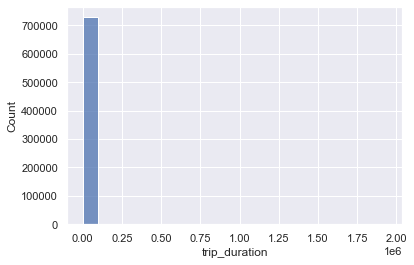

In [47]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

<AxesSubplot:xlabel='trip_duration'>

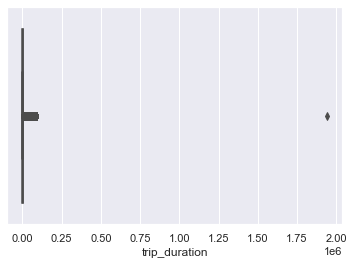

In [48]:
sns.boxplot(data["trip_duration"])

In [49]:
data["trip_duration"].sort_values(ascending = False)

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
           ...   
672240          1
102646          1
533760          1
512833          1
622664          1
Name: trip_duration, Length: 729322, dtype: int64

In [50]:
data.drop(data[data["trip_duration"] == 1939736]. index, inplace = True)

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

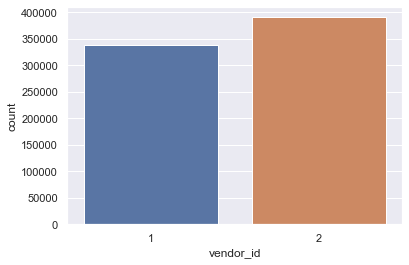

In [51]:
sns.countplot(x = "vendor_id", data = data)

### Passenger Count

In [52]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: passenger_count, dtype: int64

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

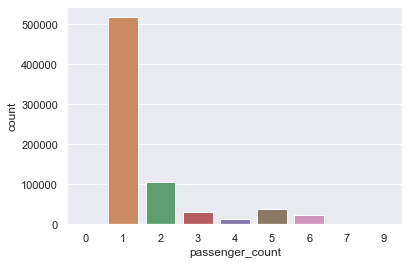

In [53]:
# Highest passenger count
sns.countplot(x = "passenger_count", data = data)

In [54]:
# lets remove th rows which have 0 or 7 or 9 passenger count
data = data[data["passenger_count"] != 0]
data = data[data["passenger_count"] <= 6]

In [55]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
Name: passenger_count, dtype: int64

In [56]:
data["store_and_fwd_flag"].value_counts(normalize = True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

### Distance

In [57]:
data["distance"].value_counts()

0.000000    2893
0.000424      20
0.000424      18
0.000424      18
0.000424      11
            ... 
2.590399       1
1.367960       1
1.657475       1
2.401507       1
2.246576       1
Name: distance, Length: 726219, dtype: int64

In [ ]:
"""The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked.
The driver deliberately took this ride to complete a target ride number.
The passengers canceled the trip.    """

### Trips per Day

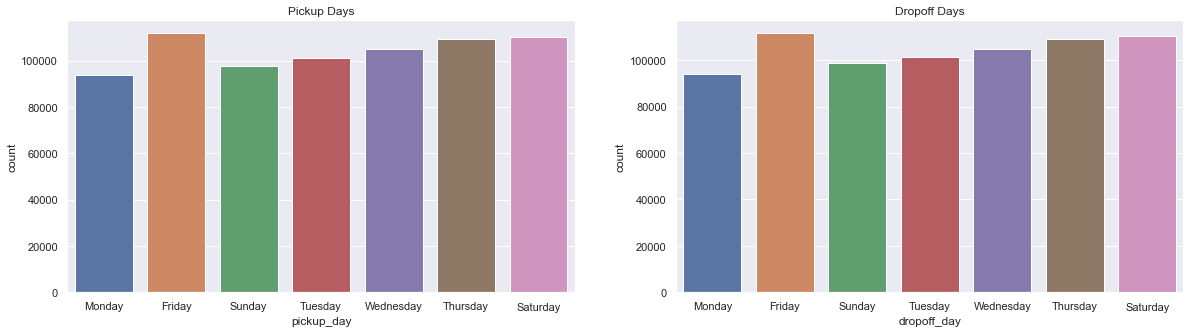

In [61]:
figure, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20,5))

ax1.set_title("Pickup Days")
ax = sns.countplot(x = "pickup_day", data = data, ax = ax1)

ax2.set_title("Dropoff Days")
ax = sns.countplot(x = "dropoff_day", data = data, ax = ax2)

### Trips per Hour

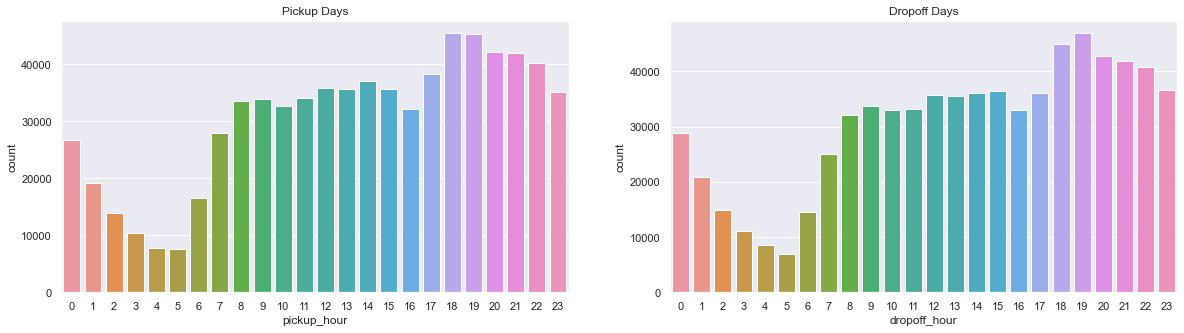

In [63]:
figure, (ax9, ax10) = plt.subplots(ncols = 2, figsize = (20,5))

ax9.set_title("Pickup Days")
ax = sns.countplot(x = "pickup_hour", data = data, ax = ax9)

ax10.set_title("Dropoff Days")
ax = sns.countplot(x = "dropoff_hour", data = data, ax = ax10)

### Trips per Time of Day

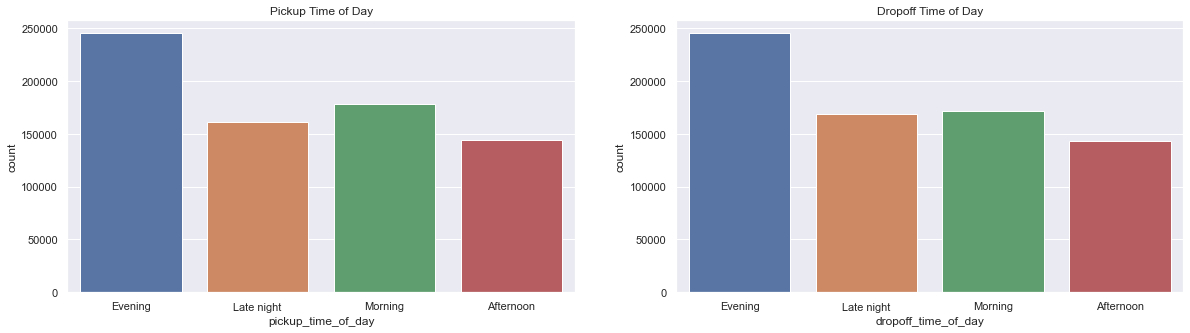

In [64]:
figure, (ax3, ax4) = plt.subplots(ncols = 2, figsize = (20,5))

ax3.set_title("Pickup Time of Day")
ax = sns.countplot(x = "pickup_time_of_day", data = data, ax = ax3)

ax4.set_title("Dropoff Time of Day")
ax = sns.countplot(x = "dropoff_time_of_day", data = data, ax = ax4)

### Trips per Month

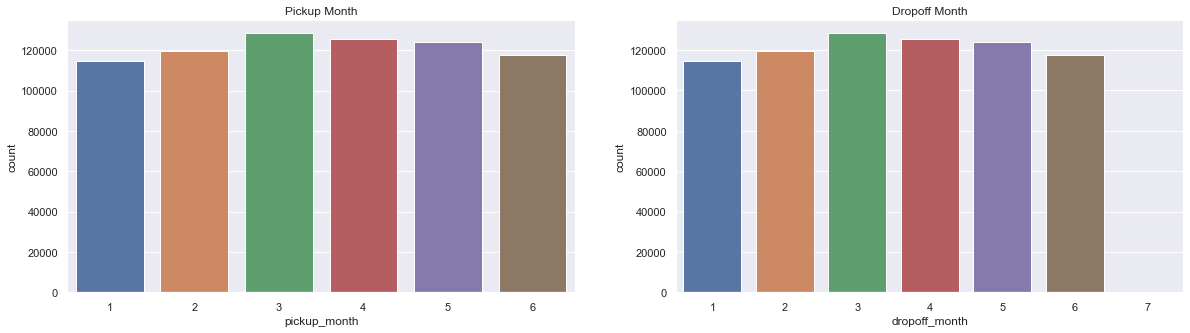

In [66]:
figure, (ax5,ax6) = plt.subplots(ncols = 2, figsize=(20,5))

ax5.set_title("Pickup Month")
ax = sns.countplot(x = "pickup_month", data = data, ax = ax5)

ax6.set_title("Dropoff Month")
ax = sns.countplot(x = "dropoff_month", data = data, ax = ax6)

## Trip Duration per Vendor

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

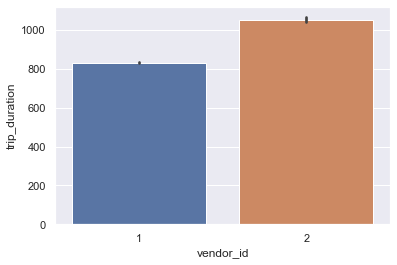

In [67]:
sns.barplot(y = "trip_duration", x = "vendor_id", data = data, estimator = np.mean)

### Trip Duration per Store and Forward Flag

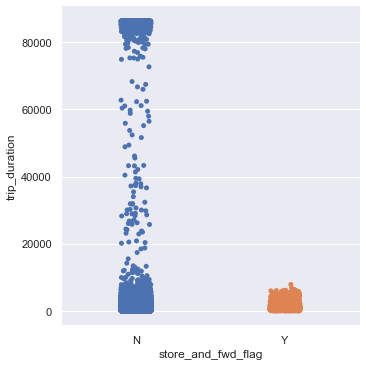

In [69]:
sns.catplot(y = "trip_duration", x = "store_and_fwd_flag", data = data, kind = "strip")

### Trip Duration per Passenger Count

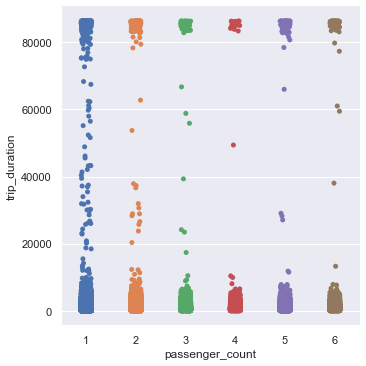

In [70]:
sns.catplot(y = "trip_duration", x = "passenger_count", data = data, kind = "strip")

### Trip Duration per hour

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

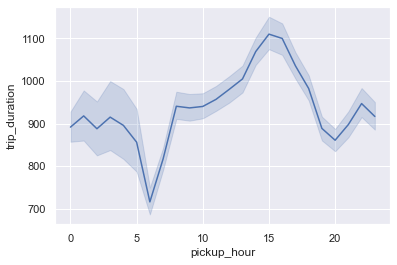

In [71]:
sns.lineplot(x = "pickup_hour", y = "trip_duration", data = data)

### Trip Duration per Time of Day

<AxesSubplot:xlabel='pickup_time_of_day', ylabel='trip_duration'>

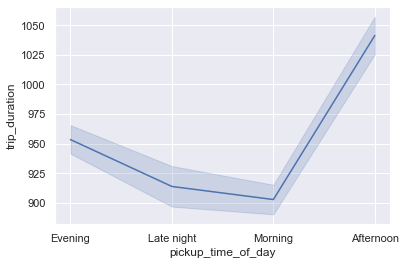

In [72]:
sns.lineplot(x = "pickup_time_of_day", y = "trip_duration", data = data)

### Trip Duration per Day of Week

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

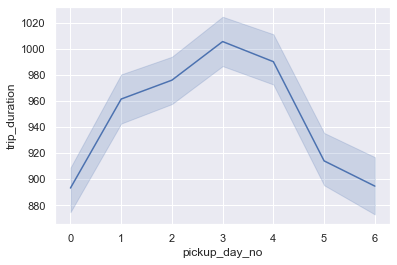

In [73]:
sns.lineplot(x = "pickup_day_no", y = "trip_duration", data = data)

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

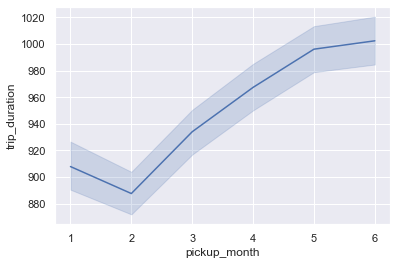

In [74]:
sns.lineplot(x = "pickup_month", y = "trip_duration", data = data)

### Distance and Vendor

<AxesSubplot:xlabel='vendor_id', ylabel='distance'>

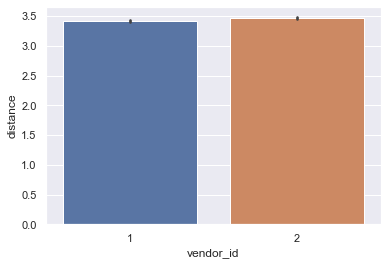

In [76]:
sns.barplot(x = "vendor_id", y = "distance", data = data, estimator = np.mean)

### Distance and Store and Forward Flag

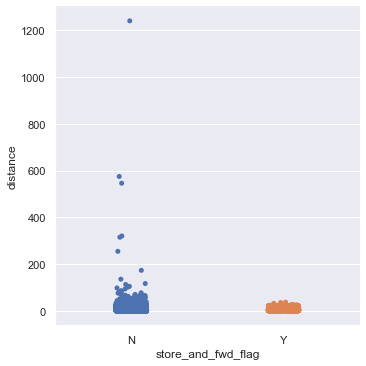

In [77]:
sns.catplot(y = "distance", x = "store_and_fwd_flag", data = data, kind = "strip")

### Distance per passenger count

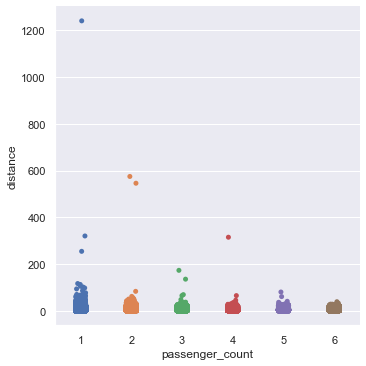

In [79]:
sns.catplot(y = "distance", x = "passenger_count", data = data, kind = "strip")

### Distance per day of week

<AxesSubplot:xlabel='pickup_day_no', ylabel='distance'>

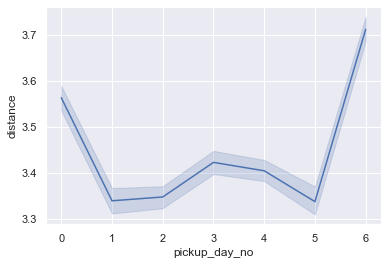

In [80]:
sns.lineplot(x  = "pickup_day_no", y = "distance", data = data)

### Distance per hour of day

<AxesSubplot:xlabel='pickup_hour', ylabel='distance'>

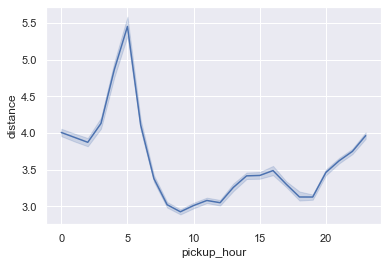

In [81]:
sns.lineplot(x  = "pickup_hour", y = "distance", data = data)

### Distance per time of day

<AxesSubplot:xlabel='pickup_time_of_day', ylabel='distance'>

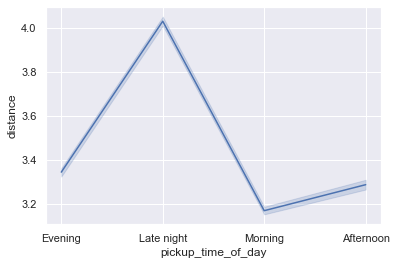

In [82]:
sns.lineplot(x  = "pickup_time_of_day", y = "distance", data = data)

### Distance per month

<AxesSubplot:xlabel='pickup_month', ylabel='distance'>

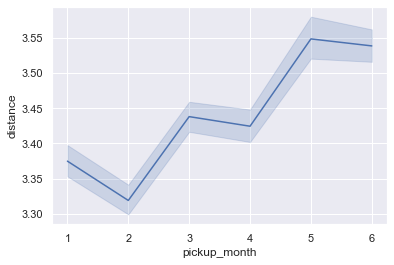

In [83]:
sns.lineplot(x  = "pickup_month", y = "distance", data = data)

### Passenger Count and Vendor id

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

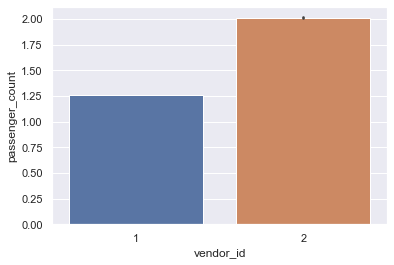

In [84]:
sns.barplot(y  = "passenger_count", x = "vendor_id", data = data)

### Trip Duration and Distance

In [ ]:
# sns.relplot(y=data.distance,x='trip_duration',data=data)

In [ ]:
data[data.distance == 0].head()

In [ ]:
data[data.distance == 0].tail()